In [5]:
# Fetches the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # return array

In [6]:
X, Y = mnist["data"], mnist["target"]
X.shape # 70000 images and each has 784 features (28*28 pixels).

(70000, 784)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

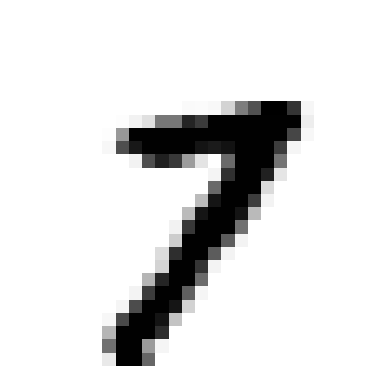

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# choose a digit from the dataset
some_digit = X[40000]
# reshape it to a 28*28 array
some_digit_image = some_digit.reshape(28, 28)
print(some_digit)
#print(some_digit_image)
# display it using Matplotlib
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
# split MNIST data set
# a training set (the first 60,000 images) and a test set (the last 10,000 images)
#normalization
X = X/255.0

#scaling the features
from sklearn.preprocessing import scale
X = scale(X)

#Break up into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

# Shuffle the training set
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 784)
(10000, 784)
(60000,)


In [9]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# linear model

model_linear = LinearSVC(multi_class='ovr', verbose=True)
model_linear.fit(X_train, y_train)

# predict
y_predLinear = model_linear.predict(X_test)

[LibLinear]

C:\Users\Josh\Desktop\Class\Comp 542\Comp 542 Project\venv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [10]:


# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predLinear), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_predLinear))



accuracy: 0.9091 

[[ 954    0    3    1    1    7    9    2    2    1]
 [   0 1108    5    2    0    1    4    1   14    0]
 [  12   13  900   15   10    2   21   14   41    4]
 [   4    4   20  916    3   17    2   10   22   12]
 [   2    3    6    4  911    0   10    4   10   32]
 [  10    2    6   45   15  733   25   11   36    9]
 [  10    4    7    3    5   11  915    0    3    0]
 [   4   11   22    5   10    2    2  920    5   47]
 [  13   12    9   21   14   27   13    8  843   14]
 [  11    9    6   18   33   10    0   22    9  891]]


In [ ]:
#rbf model

model_rbf = SVC(kernel='rbf', C=10, gamma=10)
model_rbf.fit(X_train, y_train)

# predict
y_predRBF = model_rbf.predict(X_test)

'''
from libsvm.svmutil import *

model_rbf = svm_train()
# confusion matrix and accuracy
'''
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predRBF), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_predRBF))


In [ ]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(X_train,y_train)
#print(grid.best_estimator_)

In [ ]:
'''from sklearn.metrics import classification_report

# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predLinear), "\n")

grid_predictionsRBF = grid.predict(X_test)
# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=grid_predictionsRBF), "\n")

print(confusion_matrix(y_test,y_predLinear))
print(classification_report(y_test,y_predLinear))


print(confusion_matrix(y_test,grid_predictionsRBF))
print(classification_report(y_test,grid_predictionsRBF))'''